## 代理池的基本模块

#### 获取模块
获取模块需要定时去各大代理网站抓取代理，代理可以是免费公开代理也可以是付费代理，代理的形式都是 IP 加端口，尽量从不同来源获取，尽量抓取高匿代理，抓取完之后将可用代理保存到数据库中。

### 储存模块
存储模块负责存储抓取下来的代理。首先我们需要保证代理不重复，另外我们还需要标识代理的可用情况，而且需要动态实时处理每个代理，所以说，一种比较高效和方便的存储方式就是使用 Redis 的 Sorted Set，也就是有序集合。

### 测试模块
检测模块需要定时将数据库中的代理进行检测，在这里我们需要设置一个检测链接，最好是爬取哪个网站就检测哪个网站，这样更加有针对性，如果要做一个通用型的代理，那可以设置百度等链接来检测。另外我们需要标识每一个代理的状态，如设置分数标识，100 分代表可用，分数越少代表越不可用，检测一次如果可用，我们可以将其立即设置为100 满分，也可以在原基础上加 1 分，当不可用，可以将其减 1 分，当减到一定阈值后就直接从数据库移除。通过这样的标识分数，我们就可以区分出代理的可用情况，选用的时候会更有针对性。

### 接口模块
接口模块需要用 API 来提供对外服务的接口，其实我们可以直接连数据库来取，但是这样就需要知道数据库的连接信息，不太安全，而且需要配置连接，所以一个比较安全和方便的方式就是提供一个 Web API 接口，通过访问接口即可拿到可用代理。另外由于可用代理可能有多个，我们可以提供随机返回一个可用代理的接口，这样保证每个可用代理都可以取到，实现负载均衡。

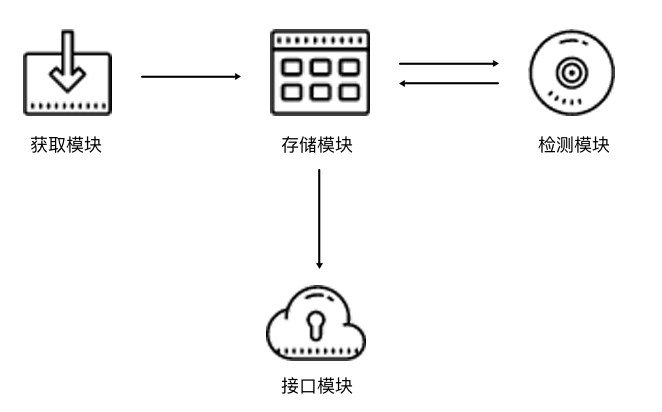